# Анализ оттока клиентов банка "Метанпром"

В данной работе нам предстоит **проанализировать возможные причины оттока клиентов банка `Метанпром` и сегментировать пользователей, наиболее склонных к оттоку.**

В части предобработки мы изучим имеющийся датафрейм, проверим, есть ли в данных пропуски, дубликаты, верно ли определены типы данных для каждого столбца, корректно ли названы столбцы, после чего проведем необходимую предобработку.

В аналитической части предстоит определить значимые признаки отточности, проанализировать портреты клиентов, склонных к оттоку и провести корреляционный анализ.

Далее нами будет произведены проверка статистических гипотез и сегментация пользователей.

**План проекта:**

1. [Загрузка и описание данных](#Загрузка-и-описание-данных)
2. [Предобработка данных](#Предобработка-данных)
    1. [Изменение названий столбцов](#Изменение-названий-столбцов)
    2. [Обработка дубликтов](#Обработка-дубликтов)
    3. [Изменение типов данных](#Изменение-типов-данных)
    4. [Обработка пропусков](#Обработка-пропусков)
    5. [Вывод](#Вывод)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
    1. [Анализ распределения признаков](#Анализ-распределения-признаков)
    2. [Анализ портрета клиентов](#Анализ-портрета-клиентов)
    3. [Корреляционный анализ](#Корреляционный-анализ)
    4. [Вывод](#Вывод)
4. [Проверка гипотез](#Проверка-гипотез)
    1. [Первая гипотеза. Доходы клиентов](#Первая-гипотеза.-Доходы-клиентов)
    2. [Вторая гипотеза. Пол клиентов](#Вторая-гипотеза.-Пол-клиентов)
    3. [Третья гипотеза. Наличие кредитных карт](#Третья-гипотеза.-Наличие-кредитных-карт)
    4. [Четвертая гипотеза. Баланс клиентов](#Четвертая-гипотеза.-Баланс-клиентов)
5. [Сегментация пользователей](#Сегментация-пользователей)
    1. [Сегмент 1](#Сегмент-1)
    2. [Сегмент 2](#Сегмент-2)
    3. [Сегмент 3](#Сегмент-3)
6. [Общие выводы и рекомендации](#Общие-выводы-и-рекомендации)

**Описание данных:**
* `user_id` - идентификатор пользователя,
* `score` - баллы кредитного скоринга,
* `city` - город филиала банка,
* `gender` - пол,
* `age` - возраст, 
* `equity` - количество баллов собственности, 
* `balance` - баланс на счёте,
* `products` - количество продуктов, которыми пользуется клиент,
* `credit_card` - есть ли кредитная карта,
* `last_activity` - активный ли клиент, 
* `est_salary` - заработная плата клиента,
* `churn` - ушел или нет.

<div style="border:solid Chocolate 2px; padding: 40px">
    
# Материалы

**Дашборд:** [Дашборд](https://public.tableau.com/app/profile/alexandra.ivankina/viz/_16886617884140/sheet2?publish=yes)


## Загрузка и описание данных

In [1]:
# Импорт библиотек

import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (15,7)
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Загрузка датафрейма
data = pd.read_csv(r'C:\Users\ivank\practicum\datasets\bank_scrooge.csv')

In [3]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


 В нашем распоряжении таблица из 10 000 строк и 12 столбцов:

* `user_id` - идентификатор пользователя,
* `score` - баллы кредитного скоринга,
* `city` - город филиала банка,
* `gender` - пол,
* `age` - возраст, 
* `equity` - количество баллов собственности, 
* `balance` - баланс на счёте,
* `products` - количество продуктов, которыми пользуется клиент,
* `credit_card` - есть ли кредитная карта,
* `last_activity` - активный ли клиент, 
* `est_salary` - заработная плата клиента,
* `churn` - ушел или нет.

На первый взгляд можно увидеть, что названия нескольких столбцов выглядят некорректно, в данных присутствуют пропуски, а также неверно определены типы данных. Перейдем к предобработке, чтобы исправить эти моменты.

[Начало страницы](#Анализ-оттока-клиентов-банка-"Метанпром")

## Предобработка данных

### Изменение названий столбцов

Необходимо привести названия столбцов к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()
data = data.rename(columns = {'userid':'user_id'})

Теперь столбцы корректно изменены - слова отделены нижнем подчеркиванием и приведены к нижнему регистру.

### Обработка дубликтов

Проверим, есть ли в данных дубликаты.

In [6]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


Явных дубликатов в таблице нет, но возможно дубликаты присутствуют в отдельно взятых столбцах.

In [7]:
data['user_id'].duplicated().sum()

73

В столбце с айди пользователя нашлось 73 дубликата, хотя айди должен быть "первичным ключом" таблицы и повторяться не должен. Просмотрим все неявные дубликаты по айди.

In [8]:
display(data[data['user_id'].duplicated()].sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
5420,126368,832.0,Рыбинск,Ж,33.0,0,NaN,1,0,0,118465.34,0
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
9504,129785,949.0,Ярославль,М,43.0,0,NaN,1,1,1,166845.37,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
7487,140377,930.0,Рыбинск,Ж,34.0,5,1123967.02,1,1,1,148336.26,0


По таблице видно, что в дубликатах присутствуют пользователи из разных городов, обоих полов, другие параметры также различаются между собой, что говорит о том, что дубликаты появились не в какой-то определенной группе людей. Проверим, есть ли пересечения дубликатов в паре Айди-Город.

In [9]:
data.duplicated(subset=['user_id', 'city']).sum()

0

Дубликатов в паре Айди-Город также не оказалось, значит в таблице данные о разных пользователях. Вероятно, в разных отделениях банка ведутся отдельные базы данных, которые потом компиллируются в одну, вследствие чего некоторые айди являются уникальными в базе отделения банка отдельного города, но могут повторяться в общей базе с несколькими городами.

### Изменение типов данных

Приведем данные к верному типу.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [11]:
data['score'] = data['score'].astype('int')

Для удобства работы с данными стоит перекодировать столбец с полом и городом в числовые значения.

In [12]:
# Дублируем нужные столбцы для обработки
data['gender_dummy'] = data['gender']
data['city_dummy'] = data['city']

In [13]:
data = pd.get_dummies(data, columns = ['gender_dummy'], drop_first=True)
data = pd.get_dummies(data, columns = ['city_dummy'])

In [14]:
data = data.rename(columns = {'gender_dummy_М':'gender_dummy', 'city_dummy_Ростов':'city_rostov',
                  'city_dummy_Рыбинск':'city_rybinsk', 'city_dummy_Ярославль':'city_yaroslavl'})

In [15]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_dummy,city_rostov,city_rybinsk,city_yaroslavl
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,1,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,0,0,1


Тип данных изменен и столбцы приведены в числовые значения. Несмотря на то, что в столбце `Возраст` целые числа, поменять тип данных мы не можем, поскольку в нем присутствуют пропуски.

В таблицу добавлены 4 столбца, значения в `gender_dummy` обозначают пол клиента в числовом значении, где 1 - мужчина, 0 - женщина. Помимо столбца с полом, добавлены 3 столбца с городом клиента, где 1 обозначает город, где обслуживается клиент банка.

### Обработка пропусков

Ранее мы уже заметили, что пропуски в датафрейме присутствуют. Посмотрим в каких столбцах были пропущены данные.

In [16]:
data.isna().sum()

user_id              0
score                0
city                 0
gender               0
age                 26
equity               0
balance           2295
products             0
credit_card          0
last_activity        0
est_salary           0
churn                0
gender_dummy         0
city_rostov          0
city_rybinsk         0
city_yaroslavl       0
dtype: int64

Пропуски есть в столбцах с возрастом и балансом клиентов банка. Проверим столбец с возрастом, возможно есть связь с другими столбцами.

In [17]:
# Проверим связь с городом филиала банка
data.query('age.isna()').groupby('city')['user_id'].count()

city
Ростов        1
Рыбинск      12
Ярославль    13
Name: user_id, dtype: int64

In [18]:
# Проверим связь с полом клиентов
data.query('age.isna()').groupby('gender')['user_id'].count()

gender
Ж    12
М    14
Name: user_id, dtype: int64

In [19]:
# Проверим связь с отточностью
data.query('age.isna()').groupby('churn')['user_id'].count()

churn
0    25
1     1
Name: user_id, dtype: int64

В основном пропуски в столбце с возрастом были выявлены в филиалах Рыбинска и Ярославля, в филиале Ростова всего 1 пропуск. пропуски разделились практически равномерно среди мужчин и женщин, однако только 1 из клиентов с пропущенным возрастом ушел, все остальные остаются клиентами банка.

Эти данные отсутствуют случайно, вероятно произошла техническая ошибка, поэтому придется оставить их как есть, так как заполнить мы их не можем и удалять их не обязательно, пропусков не так много.

Далее проверим пропуски, связанные с балансом клиентов банка.

In [20]:
# Проверим связь с городом филиала банка
data.query('balance.isna()').groupby('city')['user_id'].count()

city
Ростов        235
Рыбинск       593
Ярославль    1467
Name: user_id, dtype: int64

In [21]:
# Проверим связь с отточностью
data.query('balance.isna()').groupby('churn')['user_id'].count()

churn
0    2282
1      13
Name: user_id, dtype: int64

In [22]:
# Проверим связь с количеством продуктов
data.query('balance.isna()').groupby('products')['user_id'].count()

products
0       1
1    1950
2     315
3      29
Name: user_id, dtype: int64

Большинство пропусков присутствуют в филиале Ярославля, но есть и в других, основная масса клиентов с пропусками продолжает пользоваться услугами банка и зачастую имеет 1 продукт.

Рассмотрим средние показатели пользователей в разрезе наличия и отсутствия пропусков для сравнения.

In [23]:
# Создаем столбец, отвечающий за наличие/отсутствие пропуска, где 1 - баланс пропущен, 0 - пропуска нет
data['balance_na'] = np.where(data['balance'].isna(), 1, 0)

In [24]:
pivot_balance = data.pivot_table(index=['balance_na'], values=data.columns.drop('user_id', 'city'), 
                             aggfunc={'est_salary':'mean', 'age':'mean', 'equity':'median', 'products':'median',
                                      'credit_card':'median', 'last_activity':'median', 'city_rostov':'median', 
                                     'city_rybinsk':'median', 'city_yaroslavl':'median'})


pivot_balance['mode_gender'] = data.groupby('balance_na')['gender_dummy'].apply(lambda x: x.mode().iloc[0])

pivot_balance = pivot_balance.round(2).T

In [25]:
pivot_balance

balance_na,0,1
age,42.92,42.09
city_rostov,0.00,0.00
city_rybinsk,0.00,0.00
city_yaroslavl,1.00,1.00
credit_card,1.00,1.00
equity,4.00,0.00
est_salary,124501.87,226310.21
last_activity,1.00,1.00
products,2.00,1.00
mode_gender,0.00,1.00


In [26]:
#Удаляем столбец с отметкой о пропуске баланса, дальше он нам не понадобится
data = data.drop(columns='balance_na')

Данная сводная таблица показывает средние показатели между клиентами, у которых баланс не пропущен (0) и у клиентов с пропущенным балансом (0). Третья колонка показывает процентное изменение показателей `1` относительно показателей `0`.
По таблице видно, что разницу в возрасте между группами нет. Как мы выяснили ранее, большинство пропусков встрячаются в городе Ярославль, у людей без пропусков в среднем 4 балла собственности, с пропуском - 0. Самая большая разница наблюдается в данных с зарплатой, у людей с пропуском она на 81% выше, чем у людей без пропуска.

Поскольку только по одному параметру есть ощутимое различие, нельзя утверждать, что здесь есть прямая зависимость, поскольку записей с пропуском всего 23% от общего числа записей в таблице, в группу с пропусками случайно могли попасть выбросы по параметру зарплаты. Данные пропуски можно отнести к классификации `MCAR`, то есть пропуски случайны и не зависят от других параметров. В данном случае их нельзя заполнить усредненными значениями, так как пропуски составляют 23% от данных, в связи с чем заполнение может исказить итоги.

### Вывод

In [27]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_dummy,city_rostov,city_rybinsk,city_yaroslavl
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,1,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,0,0,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   score           10000 non-null  int32  
 2   city            10000 non-null  object 
 3   gender          10000 non-null  object 
 4   age             9974 non-null   float64
 5   equity          10000 non-null  int64  
 6   balance         7705 non-null   float64
 7   products        10000 non-null  int64  
 8   credit_card     10000 non-null  int64  
 9   last_activity   10000 non-null  int64  
 10  est_salary      10000 non-null  float64
 11  churn           10000 non-null  int64  
 12  gender_dummy    10000 non-null  uint8  
 13  city_rostov     10000 non-null  uint8  
 14  city_rybinsk    10000 non-null  uint8  
 15  city_yaroslavl  10000 non-null  uint8  
dtypes: float64(3), int32(1), int64(6), object(2), uint8(4)
memory usage: 937.6+ K

Предобработка данных была проведена: изменены названия столбцов, проверены дубликаты и пропуски, изменены типы данных. Также были добавлены столбцы, указывающие на город клиента и столбец, обозначающий пол клиента:
* `gender_dummy`: `1` - мужчина, `0` - женщина

Датафрейм готов для дальнейшего анализа.

[Начало страницы](#Анализ-оттока-клиентов-банка-"Метанпром")

## Исследовательский анализ данных

### Анализ распределения признаков 

Посмотрим на распределение признаков среди отточных и не отточных клиентов банка. Проверим, какой процент оттока клиентов по всему датафрейму.

In [29]:
data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].describe().round().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,849.0,65.0,642.0,802.0,853.0,900.0,1000.0
age,9974.0,43.0,12.0,18.0,33.0,40.0,51.0,86.0
equity,10000.0,3.0,2.0,0.0,0.0,3.0,4.0,9.0
balance,7705.0,827794.0,1980614.0,0.0,295554.0,524272.0,980706.0,119113552.0
products,10000.0,2.0,1.0,0.0,1.0,2.0,2.0,5.0
est_salary,10000.0,147867.0,139389.0,2546.0,75252.0,119658.0,174501.0,1395064.0


`score`: Баллы кредитного скоринга клиентов варьируются от 642 до 1000. Средний балл среди пользователей - 849, медиана равна 853, разница между средним и медианой весьма незначительна.

`age`: Возраст клиентов варьируется от 18 до 86 лет. Средний возраст и медиана также почти одинаковы - 43 и 40 лет соответственно.

`equity`: Количество собственности оценивается по шкале от 0 до 9. В среднем у клиентов 3 балла собственности. Только 25% клиентов имеют 4 и более баллов.

`balance`: Баланс клиентов меняется от 0 до 119 113 552. Между средним и медианным балансом есть ощутимая разница - 827 794 и 524 272 соответственно.

`products`: У клиентов может быть от 0 до 5 продуктов банка. В среднем у большинства клиентов до 2 продуктов, более 2 продуктов встречается менее, чем у 25% клиентов. 

`est_salary`: Зарплата пользователей также варьируется от 2 546 до 1 395 064. Разница между средней и медианной зарплатой также заметна - 147 867 и 119 658 соответственно.

In [30]:
print('Процент оттока клиентов:', "{:.2%}".format(data['churn'].mean()))

Процент оттока клиентов: 18.20%


#### График score

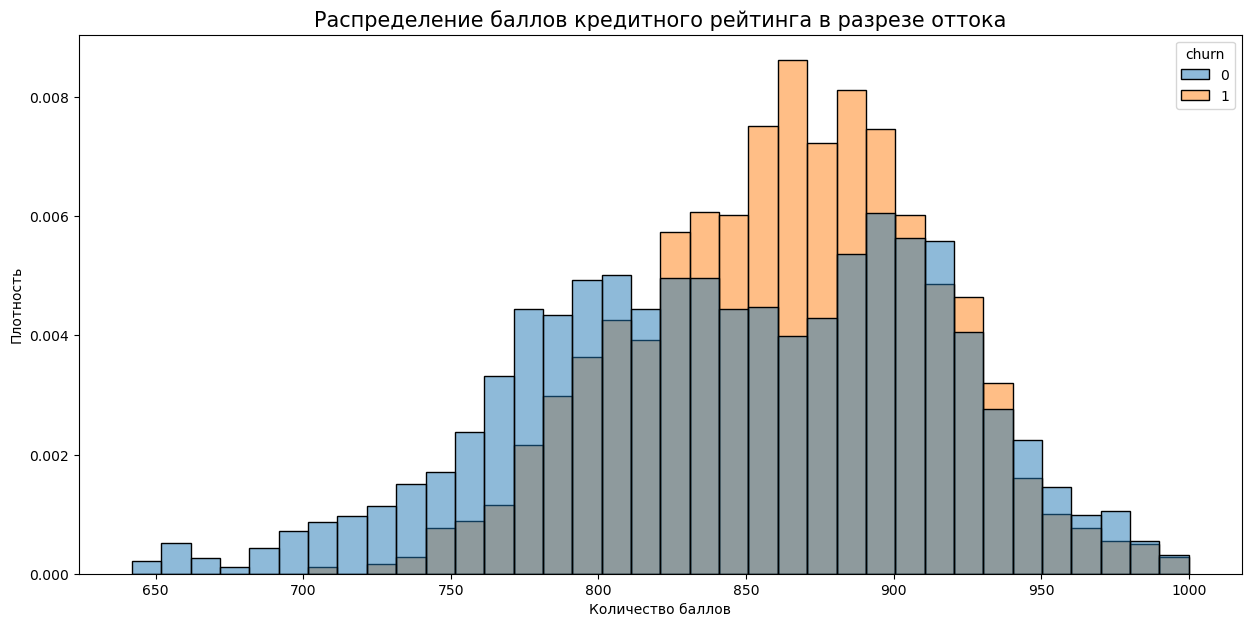

In [31]:
#График распределения баллов кредитного рейтинга
ax = sns.histplot(data, x='score', hue='churn', stat="density", common_norm=False, bins = 36)
plt.title('Распределение баллов кредитного рейтинга в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Количество баллов')
plt.ylabel('Плотность')
plt.show()

Данные графика `score` распределены нормально, основная масса клиентов имеет 750-950 баллов кредитного скоринга. Видно, что большинство ушедших клиентов имели хорошие баллы, если баллы оставшихся клиентов начинаются с 650, то баллы ушедших начинаются примерно с 700. Также среди пользователей имеющих 820-940 баллов уровень оттока выше среднего.

#### График city

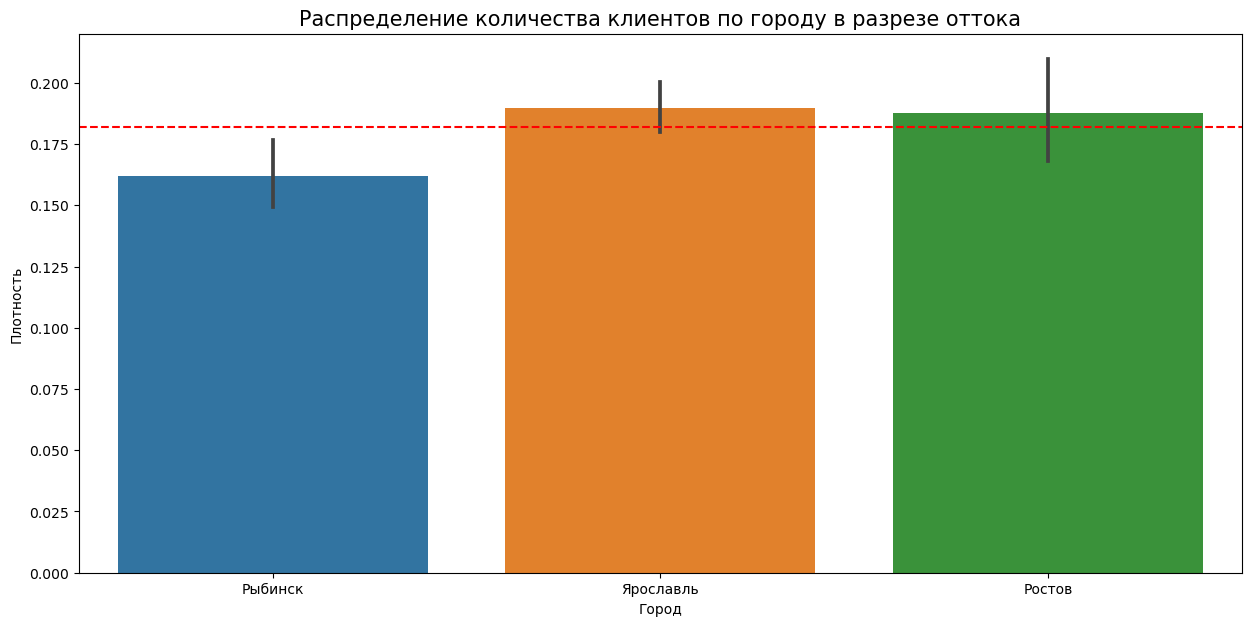

In [32]:
#График распределения клиентов по полу
ax = sns.barplot(x='city', y='churn', data=data)
ax.axhline(y=data['churn'].mean(), color='red', linestyle='--')
plt.title('Распределение количества клиентов по городу в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Город')
plt.ylabel('Плотность')
plt.show()

По графику видно, что только в городе Рыбинск уровень оттока не превышает средний по банку. В Ростове и Ярославле уровень оттока превышен практически одинаково, в Ярославле уровень оттока чуть выше, вероятно из-за того, что там обслуживатеся больше клиентов, чем в остальных городах.

#### График gender

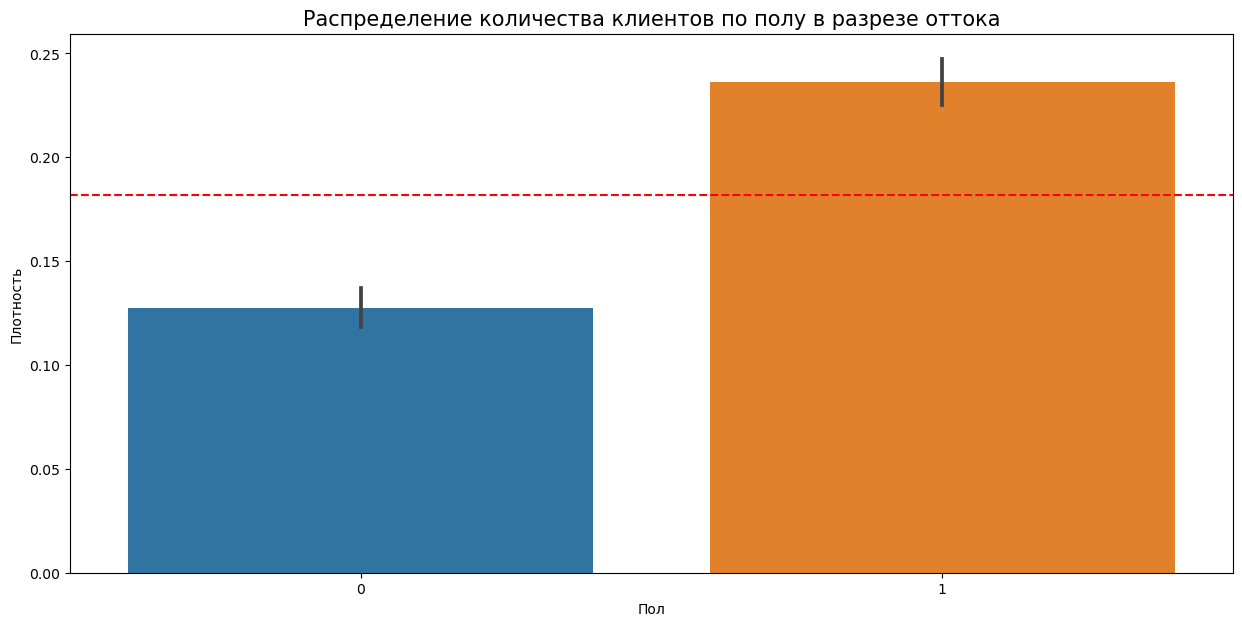

In [33]:
#График распределения клиентов по полу
ax = sns.barplot(x='gender_dummy', y='churn', data=data)
ax.axhline(y=data['churn'].mean(), color='red', linestyle='--')
plt.title('Распределение количества клиентов по полу в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Пол')
plt.ylabel('Плотность')
plt.show()

Судя по графику, мужчины гораздо более склонны к оттоку, уровень оттока превышает средний по банку. 

#### График age

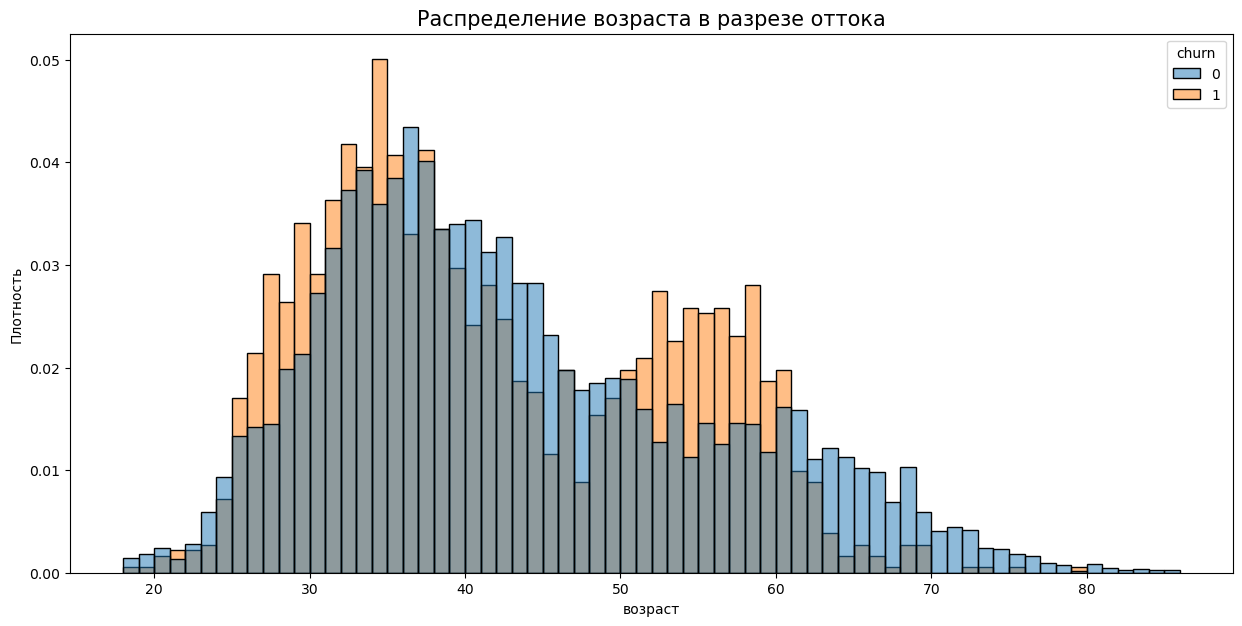

In [34]:
#График распределения возраста клиентов
ax = sns.histplot(data, x='age', hue='churn', stat="density", common_norm=False, bins = 68)
plt.title('Распределение возраста в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('возраст')
plt.ylabel('Плотность')
plt.show()

Данные графика распределены нормально, по графику видно, что есть 2 "пика" ушедших людей в возрасте диапозонов 26-36 и 50-61 год. В диапозоне 46-50 лет график слегка проседает.

#### График equity

Рассмотрим распределение количества клиентов по баллам собственности, а затем уровень оттока.

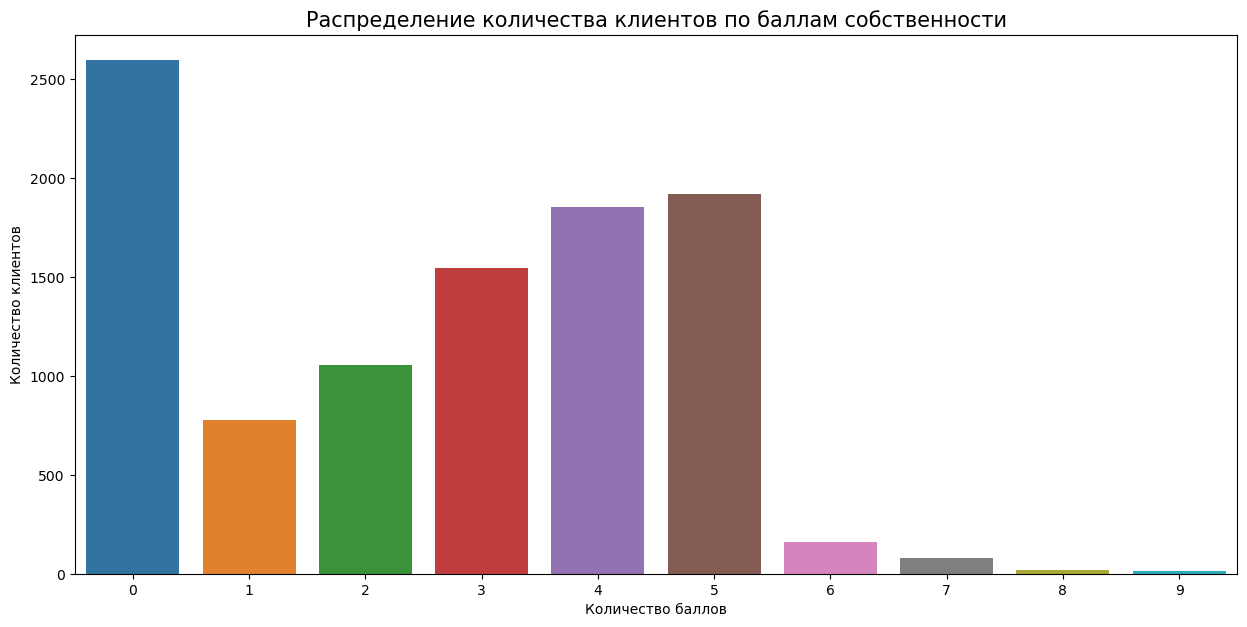

In [35]:
ax = sns.countplot(x='equity', data=data)
plt.title('Распределение количества клиентов по баллам собственности', fontdict = {'fontsize' : 15})
plt.xlabel('Количество баллов')
plt.ylabel('Количество клиентов')
plt.show()

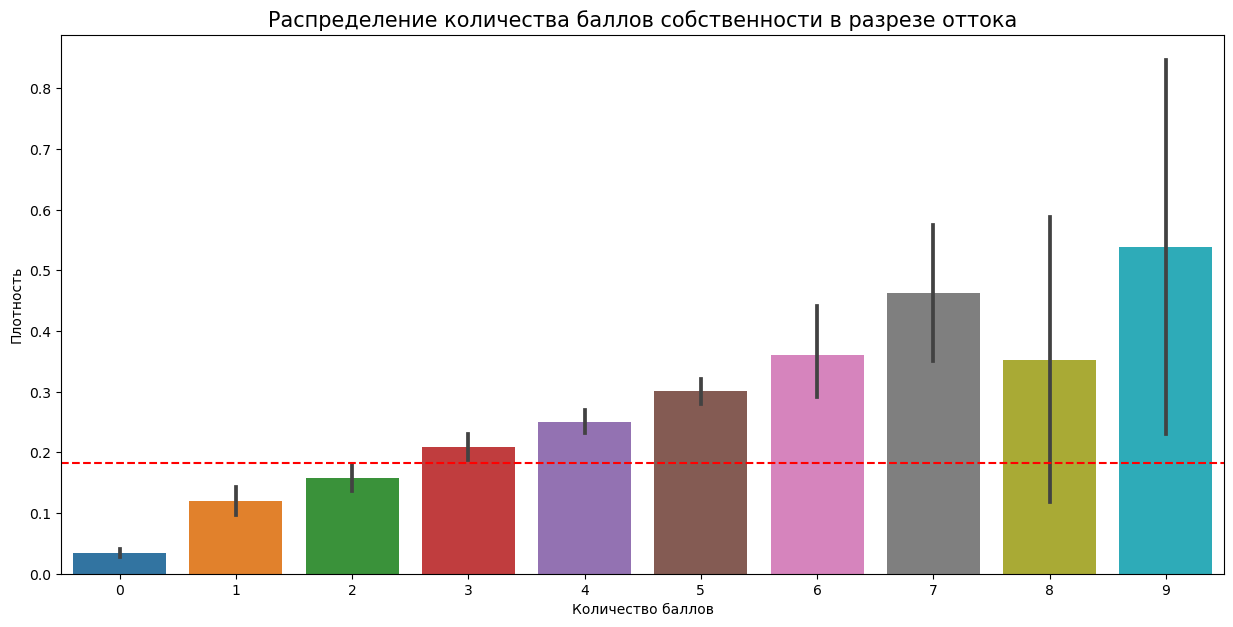

In [36]:
#График распределения баллов собственности
ax = sns.barplot(x='equity', y='churn', data=data)
ax.axhline(y=data['churn'].mean(), color='red', linestyle='--')
plt.title('Распределение количества баллов собственности в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Количество баллов')
plt.ylabel('Плотность')
plt.show()

По данным графикам мы видим, что основная масса клиентов имеет до 5 баллов собственности включительно. Клиентов, имеющих больше 5 баллов крайне мало. По графику оттока видна зависимость - чем больше у клиентов баллов собственности, тем выше уровень оттока. Уровень оттока ниже среднего встречается среди клиентов, имеющих 2 и менее баллов, от 3 и выше - отток выше среднего. Самой многочисленной группой  стала группа клиентов с 0 баллами, и также эта группа является наименее склонной к оттоку.

#### График balance

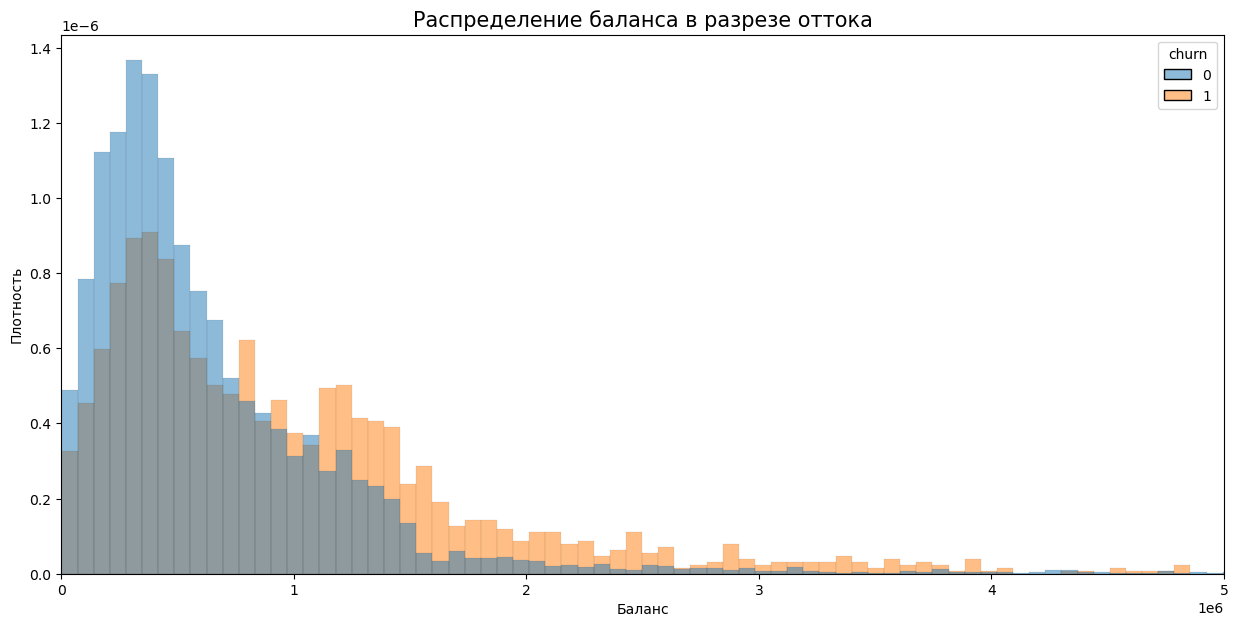

In [37]:
#График распределения баланса
ax = sns.histplot(data, x='balance', hue='churn', stat="density", common_norm=False)
ax.set_xlim(0, 5000000)
plt.title('Распределение баланса в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.show()

Распределение графика также нормально. В основном у клиентов баланс до 2.000.000, далее идут выбросы. На графике видно, что в основном клиенты, имеющие 1млн и более - отточные клиенты.

#### График products

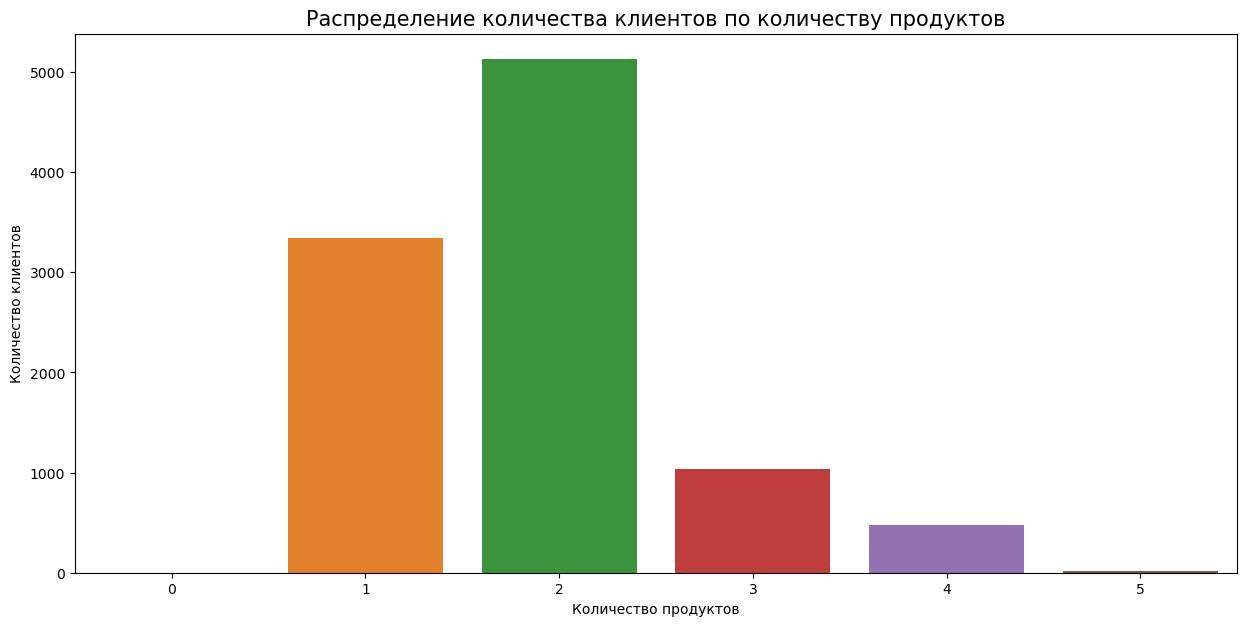

In [38]:
ax = sns.countplot(x='products', data=data)
plt.title('Распределение количества клиентов по количеству продуктов', fontdict = {'fontsize' : 15})
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.show()

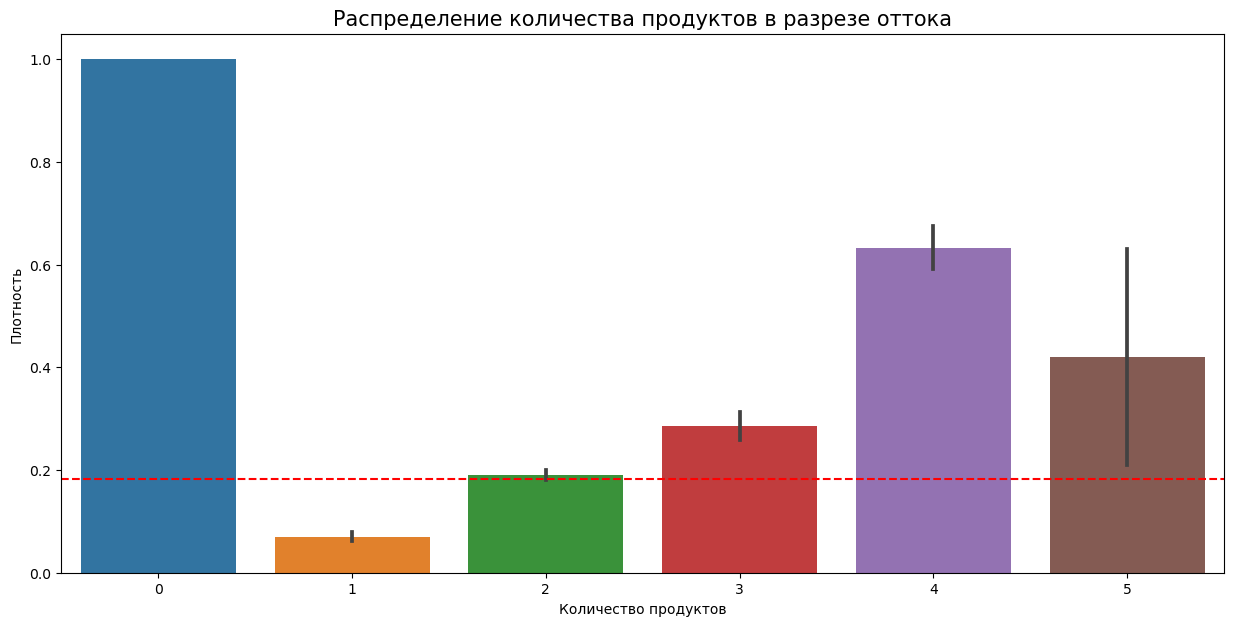

In [39]:
#График распределения продуктов
ax = sns.barplot(x='products', y='churn', data=data)
ax.axhline(y=data['churn'].mean(), color='red', linestyle='--')
plt.title('Распределение количества продуктов в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность')
plt.show()

Основная масса клиентов имеет 1 или 2 продукта банка, уровень оттока среди клиентов, имеющих 2 продуктов незначительно превышает средний уровень по банку. Клиенты имеющие 3 и более продукта наиболее склонны к уходу. Посмотрим, сколько в таблице клиентов, имеющих 0 и 5 продуктов, так как на графике их совсем не видно.

In [40]:
print(f'Количество клиентов без продуктов: {data.query("products == 0")["user_id"].count()}')
print(f'Количество клиентов с 5 продуктами: {data.query("products == 5")["user_id"].count()}')

Количество клиентов без продуктов: 1
Количество клиентов с 5 продуктами: 19


Клиент без продуктов всего 1, посмотрим на него.

In [41]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_dummy,city_rostov,city_rybinsk,city_yaroslavl
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,0,1,0


Маловероятно, что 1 человек из 10000 обслуживается банком, не имея ни одного продукта, вероятно, это ошибка.

Что касается пользователей с 5 продуктами, таких очень мало, можно сделать вывод, что предлагать людям более 2 продуктов не имеет смысла.

#### График credit_card

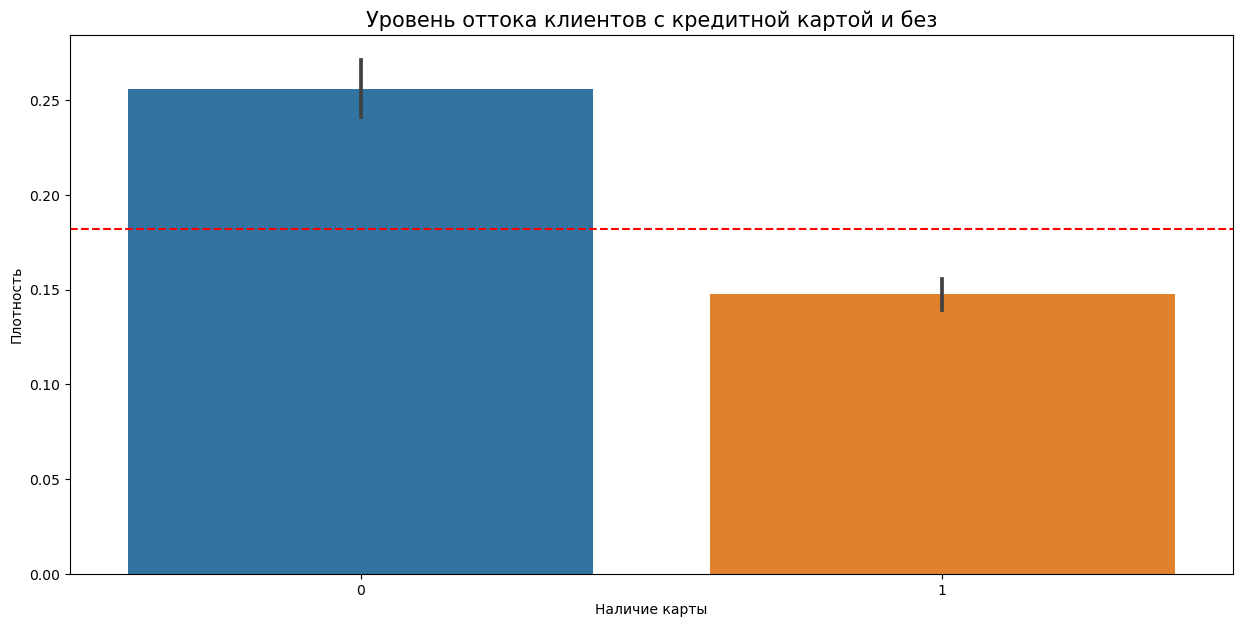

In [42]:
#График распределения клиентов с кредитной картой
ax = sns.barplot(x='credit_card', y='churn', data=data)
ax.axhline(y=data['churn'].mean(), color='red', linestyle='--')
plt.title('Уровень оттока клиентов с кредитной картой и без', fontdict = {'fontsize' : 15})
plt.xlabel('Наличие карты')
plt.ylabel('Плотность')
plt.show()

По данному графику видно, что клиенты без карты более склонны к уходу, уровень оттока превышает средний.

#### График last_activity

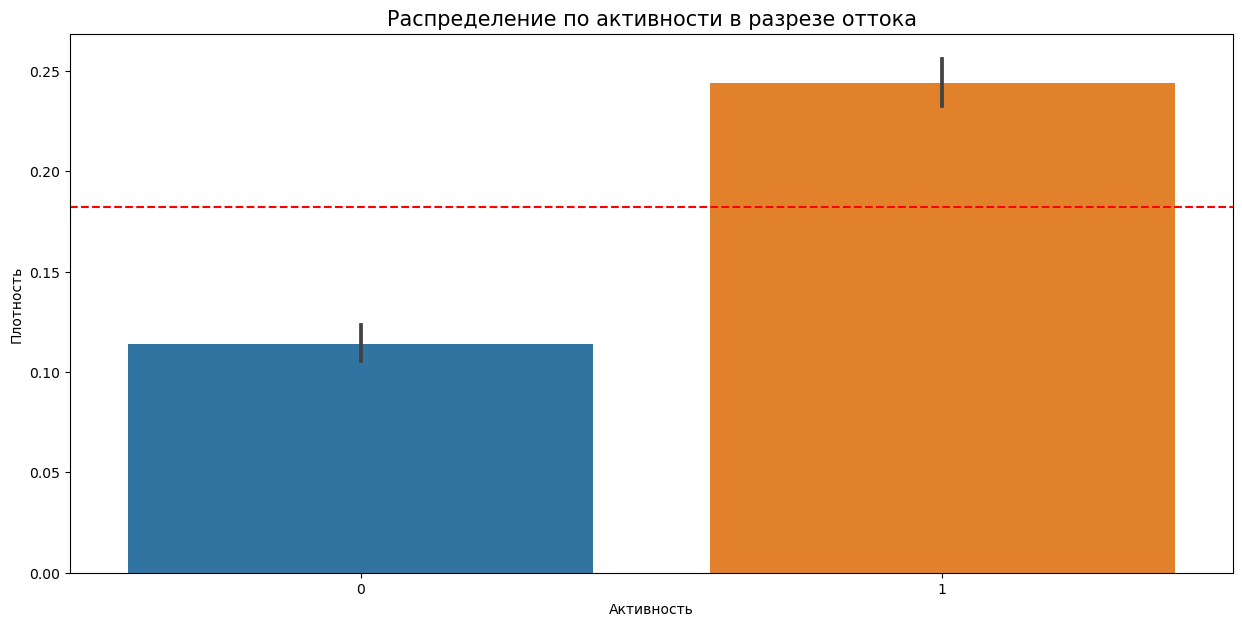

In [43]:
#График распределения клиентов по активности
ax = sns.barplot(x='last_activity', y='churn', data=data)
ax.axhline(y=data['churn'].mean(), color='red', linestyle='--')
plt.title('Распределение по активности в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Активность')
plt.ylabel('Плотность')
plt.show()

График показывает, что клиенты, проявлявшие активность за последний период, более склонны к оттоку. Вероятно, данные клиенты закрывали свои банковские продукты, переводили остаток баланса на счет другого банка и тд, поэтому в этой группе активность выше.

#### График est_salary

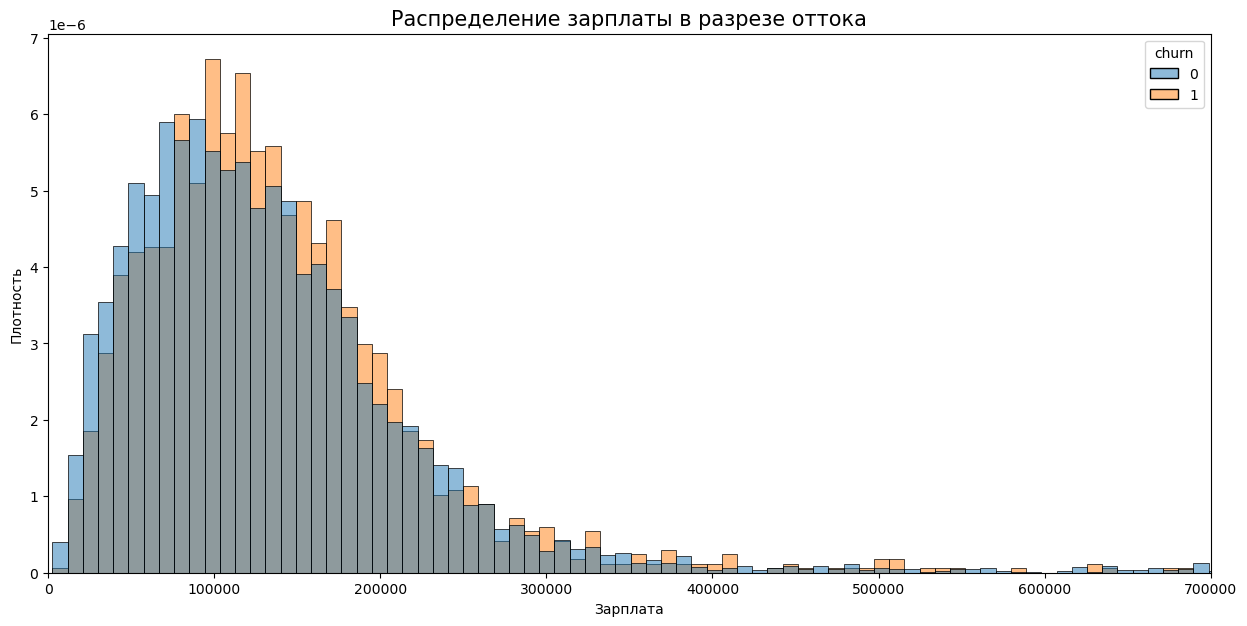

In [44]:
#График распределения зарплаты
ax = sns.histplot(data, x='est_salary', hue='churn', stat="density", common_norm=False)
ax.set_xlim(0, 700000)
plt.title('Распределение зарплаты в разрезе оттока', fontdict = {'fontsize' : 15})
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

Данные по графику распределены нормально, основная масса клиентов имеею зарплату до 200000. Судя по графику, клиенты, зарплата которых составляет от 100000 имеют более высокий уровень оттока, чем клиенты зарабатывающие до 100000. После отметки зарплаты в 300000 идут выбросы.

### Анализ портрета клиентов

Составим сводную таблицу, по которой увидим портрет "усредненного" клиента банка который остался, и который ушел.

In [45]:
pivot_table = data.pivot_table(index=['churn'], values=data.columns.drop('user_id'), 
                             aggfunc={'score':'median', 'age':'mean', 'equity':'median',
                                     'balance':'mean', 'products':'median', 'credit_card':'median', 'last_activity':'median', 
                                     'est_salary':'mean'})

pivot_table['mode_city'] = data.groupby('churn')['city'].apply(lambda x: x.mode().iloc[0])
pivot_table['mode_gender'] = data.groupby('churn')['gender'].apply(lambda x: x.mode().iloc[0])

In [46]:
pivot_table.round(2).rename({0:'Остался', 1:'Ушел'}).T

churn,Остался,Ушел
age,43.02,41.45
balance,733982.59,1133993.27
credit_card,1,1
equity,3,4
est_salary,147783.2,148243.01
last_activity,0,1
products,2,2
score,848,866
mode_city,Ярославль,Ярославль
mode_gender,Ж,М


Возраст обоих клиентов не сильно отличается, также нет ощутимых различий среди их зарплаты и баллами кредитного скоринга. Оба клиента имеют кредитную карту и 2 продукта банка, а также оба являются клиентами филиала в Ярославле. У отточного клиента на 1 пункт больше баллов собственности и чаще отточные клиенты это мужчины.

### Корреляционный анализ

Построим таблицу корреляции параметров, и посмотрим, какие из них больше всего влияют на отточность клиентов.

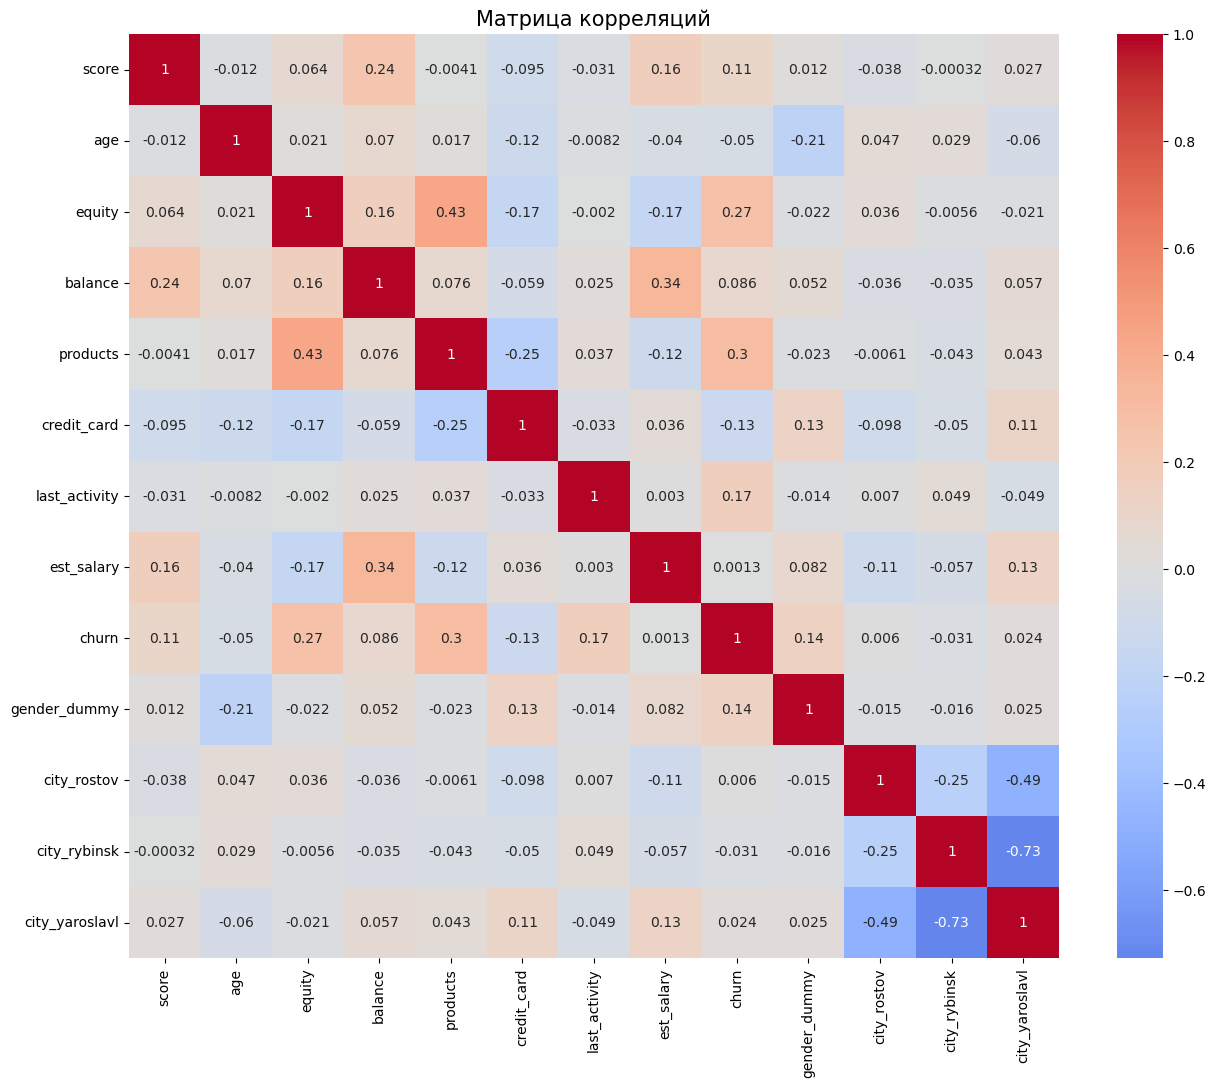

In [47]:
corr = data.drop(['city', 'gender', 'user_id'], axis=1).corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title('Матрица корреляций', fontdict = {'fontsize' : 15})
plt.show()

По данной таблице видно, что параметры слабо коррелируют как между собой, так и с показателем отточности. Для более нагладного связи параметров с отточностью, рассмотрим только их корреляцию в отдельности.

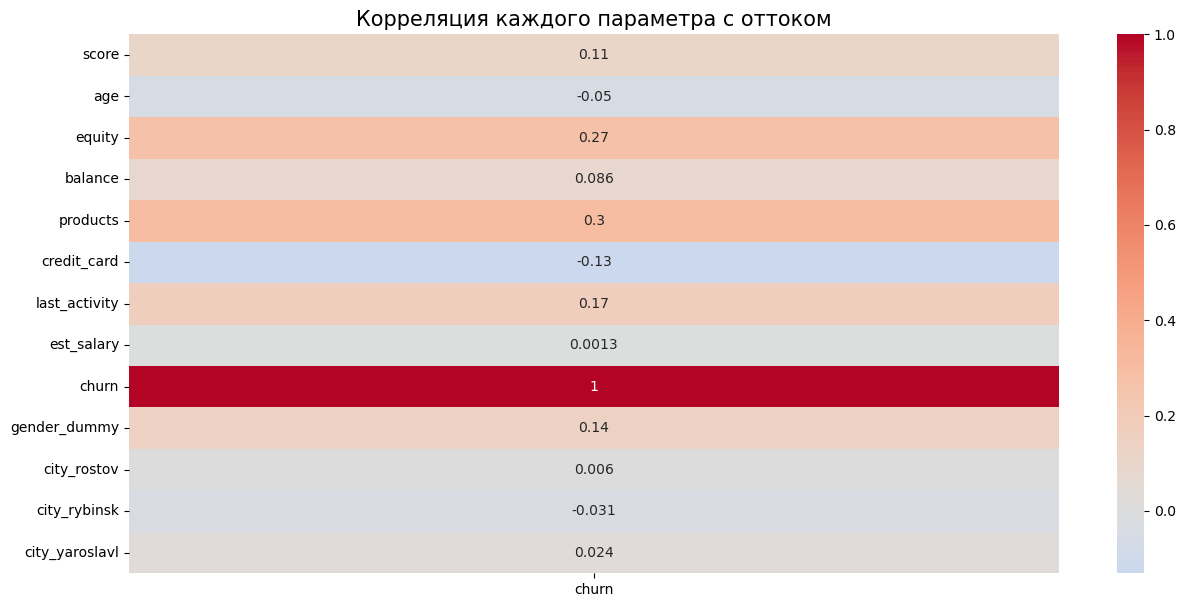

In [48]:
corr = data.drop(['city', 'gender', 'user_id'], axis=1)
sns.heatmap(corr.corr()[['churn']], cmap='coolwarm', center=0, annot=True)
plt.title('Корреляция каждого параметра с оттоком', fontdict = {'fontsize' : 15})
plt.show()

Что можно сказать о корреляции признаков по отношению к отточности по шкале Чеддока:
* признаки `score`, `age`, `balance`, `credit_card`, `last_activity`, `est_salary`, `gender`, `city_rostov`, `city_rybinsk`, `city_yaroslavl` имеют коэффициент в диапазоне 0.1-0.3 или -0.1-0.3, что означает слабую прямую или обратную взаимосвязь данных.
* признак `equity` имеет коэффициент 0.27, взяимосвязь все еще считается слабой, однако чуть выше, чем у других признаков.
* признак `products` имеет коэффициент в 0.3, что является границей между слабой и умеренной (0.3-0.5) взаимосвязью. 

В целом, судя по матрице, почти все признаки слабо коррелируют с отточностью клиентов.

### Вывод

**По итогам исследовательского анализа можно сделать некоторые выводы:**

* Средний уровень оттока пользователей в датафрейме - 18.2%;
* В среднем у пользователей около 850 баллов кредитного скоринга. Среди пользователей имеющих 820-940 баллов уровень оттока выше среднего;
* В Ярославле и Ростове уровень оттока выше среднего;
* Мужчин и женщин в датафрейме примерно 50/50, при этом мужчины уходят гораздо чаще;
* В основном у пользователей до 5 баллов собственности включительно. Пользователи с 3 и более баллами чаще уходят. Самая стабильная группа с 0 баллами собственности;
* В основном у клиентов 1-2 банковских продукта, пользователи с 3 и более продуктами более склонны к оттоку;
* Пользователи без крединтой карты уходят чаще;
* Судя по матрице корреляций, параметры слабо коррелируют с оттоком клиентов, за исключением параметра `products`, имеющего коэффициент 0.3 и находящегося на пороге слабой-умеренной взяимосвязи.

[Начало страницы](#Анализ-оттока-клиентов-банка-"Метанпром")

## Проверка гипотез

В первую очередь необходимпо определить, каким способом будет проведена проверка гипотез. Судя по графикам, распределение не всех величин было нормальным, также, поскольку мы исследуем данные в разрезе оттока, составляющего в среднем 18% по датафрейму, дисперсии в выборках не будут равны. По ЦПТ мы можем применять ttest даже в условиях ненормального распределения, если количество наблюдений выше 30 - в нашем случае эта предпосылка выполняется, поэтому для непрерывных величин используем ttest.
Для исследования пропорций будем использовать ztest для пропорций.

### Первая гипотеза. Доходы клиентов

Сформулируем первую гипотезу:
* `Н0`: Доходы клиентов, которые ушли и доходы клиентов, которые остались, равны.
* `Н1`: Доходы клиентов, которые ушли и доходы клиентов, которые остались, различаются.

In [49]:
no_churn = data.query('churn == 0')
churn = data.query('churn == 1')

In [50]:
# Проверяем равенство дисперсий
alpha = 0.05
stat, p = st.levene(
    no_churn['est_salary'], 
    churn['est_salary']
)
print(f"P-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

P-значение:0.009520715759133944
Дисперсии не равны


Как показал тест, в дисперсиях между выборками присутствует разница, поэтому при проверке гипотезы нужно настроить соответствующий параметр.

In [51]:
alpha = 0.05

results = st.ttest_ind(
    no_churn['est_salary'], 
    churn['est_salary'],
    equal_var = False
)

print('P-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-значение:  0.8887054822123845
Не получилось отвергнуть нулевую гипотезу


Судя по результату, данные не противоречат гипотезе. P-значение получилось равно 0.8887, что означает вероятность события при нулевой гепотезе около 88%, а это на порядок выше общепринятых пороговых значений в 1% и 5%. В связи с этим мы не можем отвергнуть предположение о том, что уровень доходов ушедших и оставшихся клиентов не отличается.

### Вторая гипотеза. Пол клиентов

Сформулируем гипотезы:
* `Н0`: В среднем уровне оттока между мужчинами и женщинами нет разницы.
* `Н1`: Средний уровень оттока между мужчинами и женщинами различается.

В данном случае нам нужно исследовать разницу между двумя пропорциями клиентов, поэтому здесь мы используем z-тест для пропорций.

In [52]:
women = data.query('gender_dummy == 0')['churn']
men = data.query('gender_dummy == 1')['churn']

Для проверки гипотез с категориальными признаками напишем функцию z-теста.

In [53]:
def z_test (event1, event2, total1, total2, alpha, n):

    # критический уровень статистической значимости c поправкой Бонферрони
    bonferroni_alpha = alpha / n
    
    # пропорция успехов в первой группе:
    p1 = event1/total1

    # пропорция успехов во второй группе:
    p2 = event2/total2

    # пропорция успехов в комбинированном датасете:
    p_combined = (event1 + event2) / (total1 + total2)

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total1 + 1/total2))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

In [54]:
z_test(women.sum(), men.sum(), women.count(), men.count(), 0.05, 1)

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


По результатам теста нам пришлось отвергнуть нулевую гипотезу, это означает, что есть различие в количестве ушедших мужчин и женщин. По предыдущему анализу было видно, что чаще в группу оттока входят мужчины, гипотеза не противоречит данным наблюдениям.

### Третья гипотеза. Наличие кредитных карт

Сформулируем гипотезу:
* `Н0`: Среди пользователей, имеющих и не имеющих кредитную карту, одинаковый уровень оттока.
* `Н1`: Среди пользователей, имеющих и не имеющих кредитную карту, разный уровень оттока.

In [55]:
cc = data.query('credit_card == 1')['churn']
no_cc = data.query('credit_card == 0')['churn']

In [56]:
z_test(cc.sum(), no_cc.sum(), cc.count(), no_cc.count(), 0.05, 1)

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


По результатам теста мы отвергаем гипотезу о том, что среди пользователей, имеющих и не имеющих кредитную карту, одинаковый уровень оттока. Также, имея в виду данные по анализу и портрету клиента, можно сделать вывод, что среди отточных клиентов больше людей без кредитных карт.

### Четвертая гипотеза. Баланс клиентов

Сформулируем гипотезу:
* `Н0`: Баланс ушедших и оставшихся клиентов одинаковый.
* `Н1`: Баланс ушедших и оставшихся клиентов различается.

In [57]:
churn_balance = churn['balance'].dropna()
no_churn_balance = no_churn['balance'].dropna()

In [58]:
alpha = 0.05

results = st.ttest_ind(
    no_churn_balance, 
    churn_balance,
    equal_var = False
)

print('P-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-значение:  2.0439782929669127e-13
Отвергаем нулевую гипотезу


По результатам проверки мы отвергаем нулевую гпиотезу. Баланс ушедших и оставшихся клиентов банка различается.

[Начало страницы](#Анализ-оттока-клиентов-банка-"Метанпром")

## Сегментация пользователей

На данном этапе сформулируем сегменты, которые наиболее склонны к оттоку. Средний отток по всему датафрейму около 18%, необходимо определить сегменты, где этот процент выше среднего.

Сформируем 3 сегмента со следующими признаками:
* **1 сегмент:** Мужчины с балансом более 1300000
* **2 сегмент:** Баллы кредитного скоринга 900 и более, нет кредитной карты
* **3 сегмент:** Возраст 35 и меньше, город-Ярославль

### Сегмент 1

In [59]:
print('Количество клиентов в сегменте:', data.query('gender_dummy == 1 and balance > 1300000')['user_id'].count())

print('Количество ушедших клиентов в сегменте:', data.query('gender_dummy == 1 and balance > 1300000')['churn'].sum())

print('Процент ушедших клиентов:', "{:.2%}".format(data.query('gender_dummy == 1 and balance > 1300000')['churn'].mean()))

Количество клиентов в сегменте: 612
Количество ушедших клиентов в сегменте: 336
Процент ушедших клиентов: 54.90%


В первый сегмент попали мужчины с балансом более 1300000. По графику из блока с анализом было видно, что такой баланс стремится к выбросам, а средний баланс оставшихся клиентов около 730000, поэтому баланс, выделенный в сегменте, можно считать довольно высоким. Отток в данном сегменте достаточно высокий - почти 55 процентов. Будем считать данную группу приоритетной для борьбы с оттоком. В данном случае можно провести акцию среди мужчин, предложив вклады с повышенным процентом для вкладов от 1300000. Таким образом, их средства будут задействованы банком, а сами клиенты не уйдут из-за выгоды.

### Сегмент 2

In [60]:
print('Количество клиентов в сегменте:', data.query('score >= 900 and credit_card == 0')['user_id'].count())

print('Количество ушедших клиентов в сегменте:', data.query('score >= 900 and credit_card == 0')['churn'].sum())

print('Процент ушедших клиентов:', "{:.2%}".format(data.query('score >= 900 and credit_card == 0')['churn'].mean()))

Количество клиентов в сегменте: 795
Количество ушедших клиентов в сегменте: 245
Процент ушедших клиентов: 30.82%


Приоритизируем данную группу как вторую по значимости. Процент оттока и количество ушедших людей меньше, чем в первом случае.
Около 30% клиентов, имеющих более 900 баллов кредитного скоринга и без кредитной карты, уходят из банка. Ввиду хорошего кредитного скоринга и отсутствия кредитки, можно предложить этим пользователем кредитную карту или кредит на более выгодных условиях, клиентам это может быть интересно, у банка меньше рисков иметь кредиторов неплательщиков. 

### Сегмент 3

In [61]:
print('Количество клиентов в сегменте:', data.query('age <= 35 and city_yaroslavl == 1')['user_id'].count())

print('Количество ушедших клиентов в сегменте:', data.query('age <= 35 and city_yaroslavl == 1')['churn'].sum())

print('Процент ушедших клиентов:', "{:.2%}".format(data.query('age <= 35 and city_yaroslavl == 1')['churn'].mean()))

Количество клиентов в сегменте: 2038
Количество ушедших клиентов в сегменте: 459
Процент ушедших клиентов: 22.52%


Данный сегмент является третьим по значимости в данном исследовании поскольку уровень оттока не сильно выше среднего до датафрейму.

В данный сегмент попали клиенты 35-лет и младше из города Ярославль. В данном случае можно провести некую акцию в Ярославле по поддержке молодых семей, в рамках акции можно предложить ипотеку по сниженным ставкам.

[Начало страницы](#Анализ-оттока-клиентов-банка-"Метанпром")

## Общие выводы и рекомендации

На основании проведенной работы можно сделать следующие выводы:
* Пользователи из Ярославля и Ростова чаще отказываются от услуг банка;
* Мужчины чаще женщин уходят из банка;
* В датафрейме присутствуют данные о клиентах 18-86 лет. Средний возраст ушедших и оставшихся клиентов - 41-43 года;
* Клиенты, имеющие 3 и более баллов собственности, уходят чаще. Клиенты, имеющие 6 и более баллов собственности уходят практически полностью. Чем больше баллов собственности - тем с большей вероятностью клиент уйдет;
* Чаще уходят клиенты с 3 и более продуктами;
* Баланс ушедших клиентов выше, чем оставшихся.

Было проверено 4 гипотезы по итогам которых:
* Доходы клиентов, которые ушли и доходы клиентов, которые остались, равны;
* Средний уровень оттока между межчинами и женщинами различается;
* Среди пользователей, имеющих и не имеющих кредитную карту, разный уровень оттока;
* Баланс ушедших и оставшихся клиентов различается.

Также были сформированы 3 отточных сегмента, для которых были предложены рекомендации:
* Мужчины с балансом более 1300000 - 54.5% оттока:
    * предложить вклады с повышенным процентом для вкладов от 1300000. Таким образом, их средства будут задействованы банком, а сами клиенты не уйдут из-за выгоды;
    
* Баллы кредитного скоринга 900 и более, нет кредитной карты - 30.82% оттока:
    * предложить пользователем кредитную карту или кредит на более выгодных условиях, клиентам это может быть интересно, у банка меньше рисков иметь кредиторов неплательщиков;
    
* Клиенты из Ярославля 35 лет и младше - 22.52% оттока:
    * в рамках акции поддержки молодых семей предложить ипотеку по сниженным ставкам для данных клиентов.

[Начало страницы](#Анализ-оттока-клиентов-банка-"Метанпром")